# Milestone 2 : Project proposal and initial analyses 🍻

<hr style="clear:both">
This notebook was made for the ADA course at EPFL (CS-401). 

Group : BeerADAventure46

**Authors:** \
[Agatha Hunter](https://people.epfl.ch/agatha.hunter)\
[Anne-Valérie Preto](https://people.epfl.ch/anne-valerie.preto)\
[Tristan Carruzzo](https://people.epfl.ch/tristan.carruzzo)\
[Thamin Maurer](https://people.epfl.ch/thamin.maurer)\
[Victor Dubien](https://people.epfl.ch/victor.dubien)


**Supervisor:**\
[Beatriz Borges](https://people.epfl.ch/beatriz.borges)
<hr style="clear:both">



<blockquote>

## Project proposal  📌

**Influence of the serving style on the tasting profile**:

Goal of the project: Use the textual reviews to find for each beer how it was served (either bottle, can or draft) and find how it influences the tasting profile.

Different serving styles may be adopted in different regions or for different types of beer.  The influence of the serving style could influence not only the appearance, but also the aroma, the palate or the taste.
</blockquote>

### Import libraries

In [1]:
from utils import *

pd.set_option('display.max_columns', None)

## 1. Datasets 📂

### 1.1 Import dataset

In [2]:
## Firt time imports
 
# Convert txt to csv
#ratings = convert_txt_to_csv(input_file='ratings.txt', export=True, file_name='ratings')
#reviews = convert_txt_to_csv(input_file='reviews.txt', export=True, file_name='reviews')

<div class="alert alert-block alert-danger">
<b>Danger:</b> 
Change function to read directly from zip file!
</div>

In [2]:
## Files already converted, so we can load them directly

reviews = pd.read_csv(dataset_path + 'reviews.csv')
beers = pd.read_csv(dataset_path + 'beers.csv')
breweries = pd.read_csv(dataset_path + 'breweries.csv')
users = pd.read_csv(dataset_path + 'users.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/BeerAdvocate/reviews.csv'

### 1.2 Initial datasets analysis 🔎

#### 1.2.1 Beers dataset 🍺

In [4]:
display(beers.sample(3))
print('Shape of beers : ', beers.shape)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
86615,64408,Penalty Shot Porter,22230,Jack's Brewing Company,American Porter,0,0,NaN,NaN,NaN,5.8,NaN,NaN,0,NaN
17991,187079,La Pitoune,17233,Microbrasserie La Chouape,Belgian Strong Pale Ale,0,0,NaN,NaN,NaN,6.7,NaN,NaN,0,NaN
44302,99518,Beera Burro,15578,The Dancing Camel Brewing Co.,Scottish Ale,3,1,3.59,NaN,NaN,6.0,3.606667,NaN,0,NaN


Shape of beers :  (280823, 15)


In [5]:
# print the number of beers id and beer name
print('Number of different beers id:', len(beers.beer_id.unique()))
print('Number of different beers name:', len(beers.beer_name.unique()))

Number of different beers id: 280823
Number of different beers name: 236209


<blockquote>

**Initial comments about the dataset**

-Some beers have the same name! In order to avoid confusion, we will drop the column beer_name (and brewery_name) from the dataset.

-As we will not use the RateBeer dataset, we can also drop the column nbr_matched_valid_ratings and avg_matched_valid_ratings.  

-The column bros_score only reflect the ratings from the two creators of the website, so we can also drop it.  

-ba_score represents the percentage (rounded to the tenth for depth) of raters who gave the beer a 3.75 or higher as long as the beers as at least 10 ratings.

</blockquote>

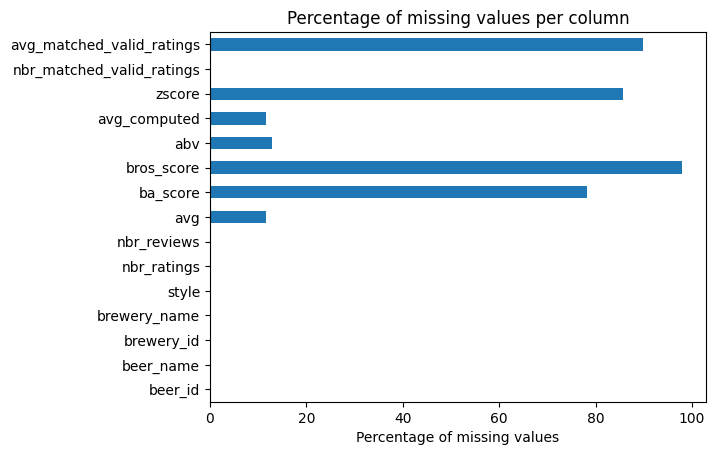

avg                      : 32829 missing values (11.69%)
ba_score                 : 219623 missing values (78.21%)
bros_score               : 275121 missing values (97.97%)
abv                      : 36024 missing values (12.83%)
avg_computed             : 32841 missing values (11.69%)
zscore                   : 240538 missing values (85.65%)
avg_matched_valid_ratings: 252551 missing values (89.93%)


In [6]:
show_missing(beers)

<blockquote>

**More comments about the dataset**

-We see that more than 80% of the beers do not have a z-score value. Since this value takes into account reviews from both websites and is vastly missing, we can drop the column alongside avg_computed. We might compute them manually later if needed.

-80% of the beers have no ba_score value, so we can also drop it and compute it later if needed.

-The other columns with NaN such as avg_matched_valid_ratings, avg_computed or bros_score are not useful in our analysis since we only look at the BeerAdvocate reviews.

-The column abv, which represents the alcohol percentage in a beer, is missing for approximately 12%.

</blockquote>

In [7]:
beers_filtered = beers.drop(columns=['beer_name', 
                            'brewery_name',
                            'bros_score',
                            'ba_score',
                            'nbr_matched_valid_ratings',
                            'avg_matched_valid_ratings',
                            'zscore',
                            'avg_computed']).copy(deep=True)

beers_filtered.rename(columns={'nbr_ratings': 'beer_nbr_ratings',
                               'nbr_reviews': 'beer_nbr_reviews'}, inplace=True)

In [8]:
beers_filtered.sample(3)

,beer_id,brewery_id,style,beer_nbr_ratings,beer_nbr_reviews,avg,abv
146611,120548,33934,American Amber / Red Ale,1,0,3.50,6.1
136050,168462,418,American IPA,263,53,3.56,4.8
139607,111531,32810,American Double / Imperial IPA,8,0,3.69,9.5


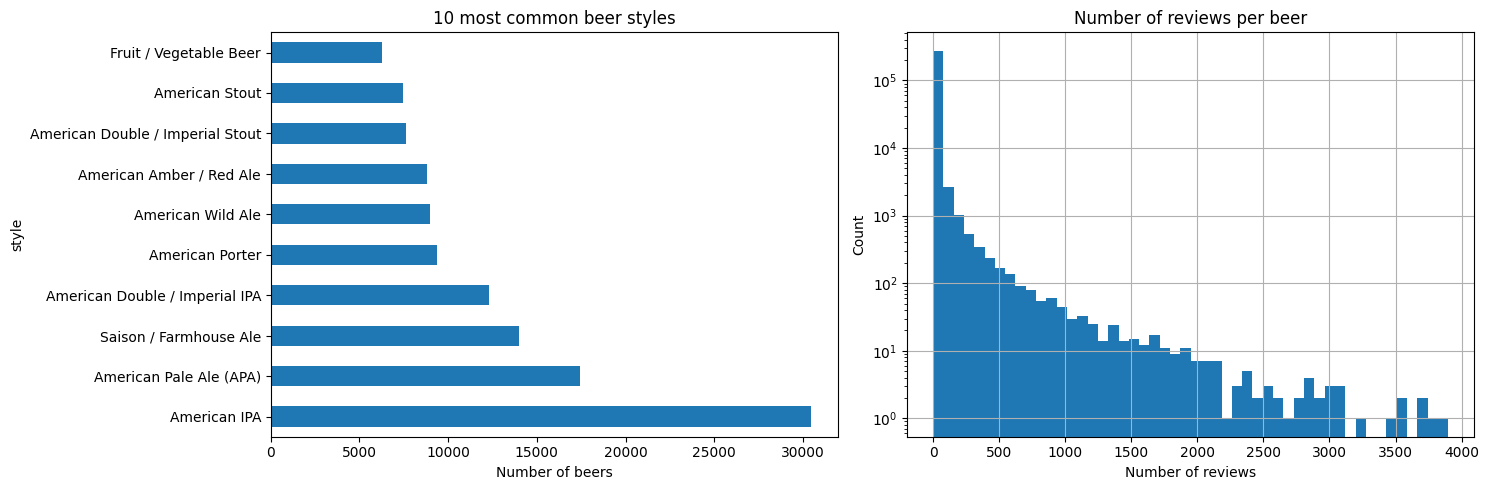

In [9]:
# Representation of the beers dataset
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
beers_filtered['style'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common beer styles')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
beers_filtered['beer_nbr_reviews'].hist(bins=50,log=True)
plt.title('Number of reviews per beer')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.tight_layout()
plt.show()

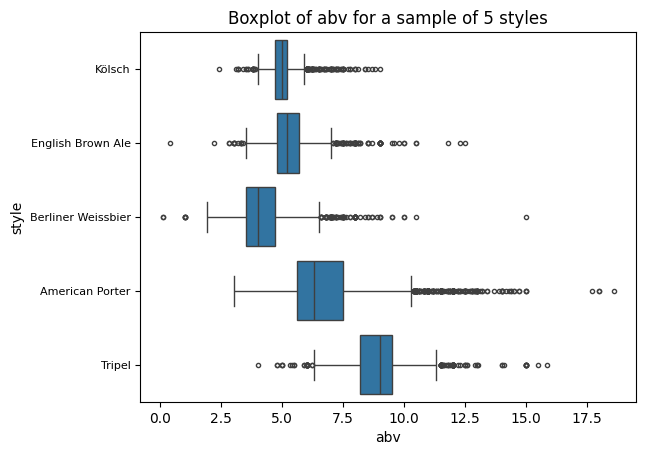

In [10]:
# boxplot of abv for sample of beers 
plt.figure()
sample_styles = beers_filtered['style'].sample(5)  # Select a sample of 5 beer styles
sns.boxplot(y='style', x='abv', data=beers_filtered[beers_filtered['style'].isin(sample_styles)], fliersize=3)
plt.yticks(fontsize=8)
plt.title('Boxplot of abv for a sample of 5 styles')
plt.show()

In [11]:
# group the beers by style and compute the median of abv for each style
median_abv_by_style = beers_filtered.groupby('style')['abv'].median()
# display(median_abv_by_style.sample(3))

# fill the missing abv values with the median of abv for the style of each beer
beers_filtered['abv'] = beers_filtered.apply(lambda x: median_abv_by_style[x['style']] if pd.isna(x['abv']) else x['abv'], axis=1)

In [12]:
beers_filtered.describe()

,beer_id,brewery_id,beer_nbr_ratings,beer_nbr_reviews,avg,abv
count,280823.000000,280823.000000,280823.000000,280823.000000,247994.000000,280823.000000
mean,148556.817141,21335.895860,29.887267,9.221417,3.721034,6.434481
std,84307.593397,15385.715656,231.010063,68.866445,0.476003,1.984850
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,76513.500000,3835.000000,1.000000,0.000000,3.500000,5.000000
50%,148867.000000,24075.000000,2.000000,1.000000,3.780000,6.000000
75%,221817.500000,33960.000000,8.000000,2.000000,4.010000,7.300000
max,293296.000000,49817.000000,16509.000000,3899.000000,5.000000,67.500000


<blockquote>

We are left with a dataset containing 280823 beers. We are only missing some values for avg as some beers do not have any ratings/reviews. They will be removed later when merging with the reviews dataset anyway.

</blockquote>

#### 1.2.2 Breweries dataset 🏭

In [13]:
display(breweries.sample(3))
print('Shape of breweries : ', breweries.shape)

,id,location,name,nbr_beers
10898,12997,"United States, Indiana",Ram Restaurant & Brewery,4
13467,33827,"United States, Oregon",Awesome Ales,6
5243,28318,Russia,OOO Suchanpivo,0


Shape of breweries :  (16758, 4)


In [14]:
# show the missing values
show_missing(breweries)

There are no missing values in this dataset.


<blockquote>

This dataset has no missing values, we will simply rename the columns and drop the brewery name.

</blockquote>

In [15]:
breweries_filtered = breweries.drop(columns=['name']).copy(deep=True)

breweries_filtered.rename(columns={'id':'brewery_id',
                                   'location':'brewery_location',
                                   'nbr_beers':'brewery_nbr_beers'}, inplace=True)

In [16]:
display(breweries_filtered.sample(3))
print('Shape of breweries filtered: ', breweries_filtered.shape)

,brewery_id,brewery_location,brewery_nbr_beers
16729,16099,"United States, Florida",0
13875,33844,"United States, Texas",18
2101,13236,Canada,12


Shape of breweries filtered:  (16758, 3)


In [17]:
# Some breweries have weird location values, they contain google maps links. All the breweries with a weird location value are in the US.
print('Number of breweries with a weird location value:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]))

# for loc in breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_location'].unique():
#     print(loc) # print the strange values

Number of breweries with a weird location value: 35


In [18]:
# manually adding the location for those 35 breweries

#obtain the brewery_id of the 35 breweries
strange_id = breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_id'].unique()

# create a dic with the brewery_id as key and unknwon as value
dic = {}
for i in strange_id:
    dic[i] = 'unknown'
    
# function that takes as input the brewery_id and a location and change the location of the brewery with the given id in the dictionary dic 
def change_location(brewery_id, us_state):
    location = 'United States, ' + us_state
    dic[brewery_id] = location

In [19]:
# take the first element of dic that has value unknown and print its location
for key, value in dic.items():
    if value == 'unknown':
        print('Brewery id:', key)
        print('Strange location:',breweries_filtered[breweries_filtered['brewery_id'] == key]['brewery_location'].values[0])        
        break

Brewery id: 2434
Strange location: United States</a> | <a href="http://maps.google.com/maps?oi=map&q=%2C+US" target="_blank">map</a><br><a href="http://bluecorncafe.com" target="_blank">bluecorncafe.com


In [20]:
#Changing the location in dic

change_location(brewery_id=2434,us_state='New Mexico')
change_location(brewery_id=2730,us_state='Wisconsin')
change_location(brewery_id=1551,us_state='California')
change_location(brewery_id=1552,us_state='Michigan')
change_location(brewery_id=2710,us_state='California')
change_location(brewery_id=3681,us_state='Ohio')
change_location(brewery_id=2413,us_state='California')
change_location(brewery_id=1793,us_state='Virginia')
change_location(brewery_id=6045,us_state='New Jersey')
change_location(brewery_id=2776,us_state='New York')
change_location(brewery_id=1751,us_state='Texas')
change_location(brewery_id=1554,us_state='Georgia')
change_location(brewery_id=1961,us_state='Maine')
change_location(brewery_id=4927,us_state='South Carolina')
change_location(brewery_id=23973,us_state='Maine')
change_location(brewery_id=2512,us_state='California')
change_location(brewery_id=6416,us_state='New Jersey')
change_location(brewery_id=2104,us_state='Oregon')
change_location(brewery_id=3079,us_state='Washington')
change_location(brewery_id=2410,us_state='Michigan')
change_location(brewery_id=1931,us_state='Ohio')
change_location(brewery_id=1553,us_state='Maine')
change_location(brewery_id=1550,us_state='Colorado')
change_location(brewery_id=32764,us_state='Illinois')
change_location(brewery_id=8451,us_state='Wyoming')
change_location(brewery_id=5114,us_state='California')
change_location(brewery_id=1802,us_state='North Carolina')
change_location(brewery_id=1819,us_state='Minnesota')
change_location(brewery_id=200,us_state='California')
change_location(brewery_id=918,us_state='Florida')
change_location(brewery_id=4343,us_state='California')
change_location(brewery_id=9765,us_state='New York')
change_location(brewery_id=1927,us_state='Colorado')
change_location(brewery_id=28908,us_state='Utah')
change_location(brewery_id=70,us_state='Oregon')
change_location(brewery_id=1567,us_state='Hawaii')

In [21]:
# change the location of the breweries in the breweries_filtered dataframe
for key, value in dic.items():
    breweries_filtered.loc[breweries_filtered['brewery_id'] == key, 'brewery_location'] = value

In [22]:
# how many different locations are there that contain United States
print('Number of different locations that contain United States:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('United States')]['brewery_location'].unique()))

Number of different locations that contain United States: 50


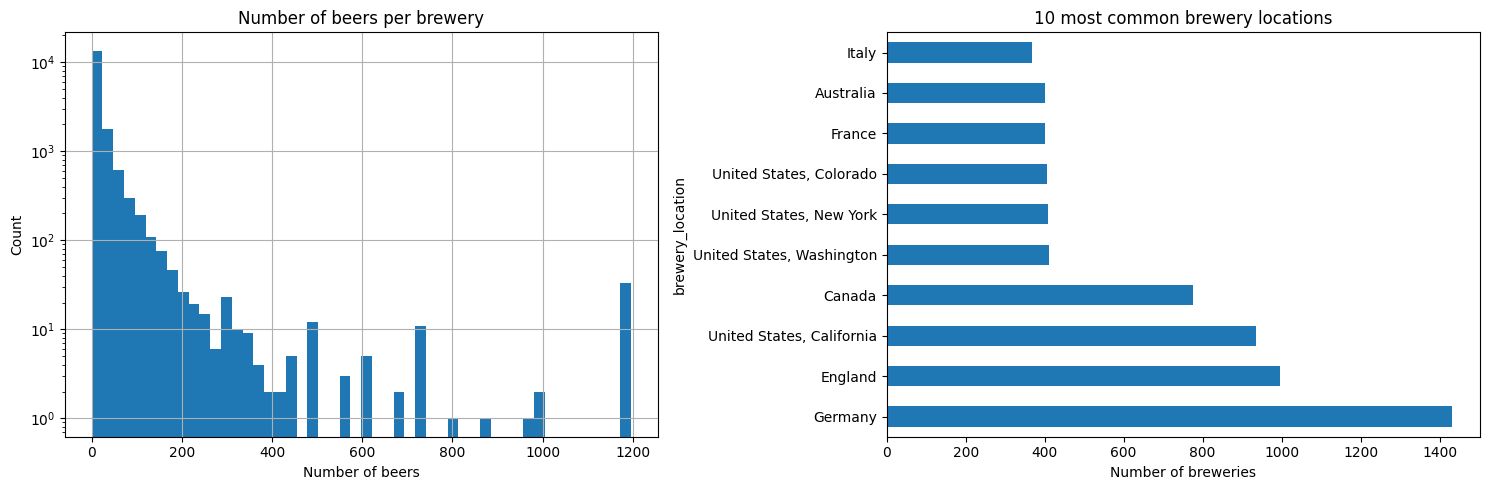

In [23]:
# Representation of beers per brewery and most common brewery locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
breweries_filtered['brewery_nbr_beers'].hist(bins=50, log=True)
plt.title('Number of beers per brewery')
plt.ylabel('Count')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
breweries_filtered['brewery_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common brewery locations')
plt.xlabel('Number of breweries')
plt.tight_layout()
plt.show()

#### 1.2.3 Users dataset 👤

In [24]:
display(users.sample(3))
print('Shape of users : ', users.shape)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
141327,1,0,nategreenman.458124,nategreenman,1.273572e+09,"United States, Michigan"
37576,5,5,matthaus_2000.1103523,matthaus_2000,1.454497e+09,Canada
92841,1,1,dubyn.913669,Dubyn,1.419419e+09,"United States, Washington"


Shape of users :  (153704, 6)


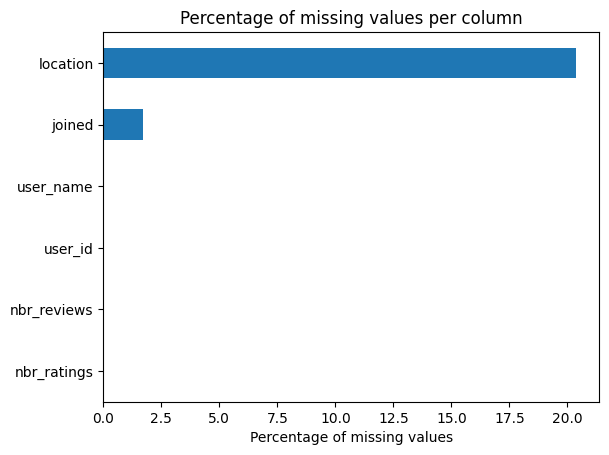

user_name                :     1 missing values (0.00%)
joined                   :  2652 missing values (1.73%)
location                 : 31279 missing values (20.35%)


In [25]:
show_missing(users)

<blockquote>

We are only missing information about when the user joined the website and locations. (and 1 username, which we drop anyway)

</blockquote>

In [26]:
users_filtered = users.drop(columns=['user_name']).copy(deep=True)

users_filtered.rename(columns={'nbr_ratings':'user_nbr_ratings',
                               'nbr_reviews':'user_nbr_reviews',
                               'joined':'user_joined',
                               'location':'user_location'}, inplace=True)

display(users_filtered.sample(3))
print('Shape of users filtered: ', users_filtered.shape)

,user_nbr_ratings,user_nbr_reviews,user_id,user_joined,user_location
78080,2,0,jbinthe615.860968,1.410257e+09,"United States, Virginia"
39393,25,6,avool1960.837547,1.406974e+09,"United States, New Jersey"
137648,1,0,mvanliere.721669,1.362395e+09,"United States, Massachusetts"


Shape of users filtered:  (153704, 5)


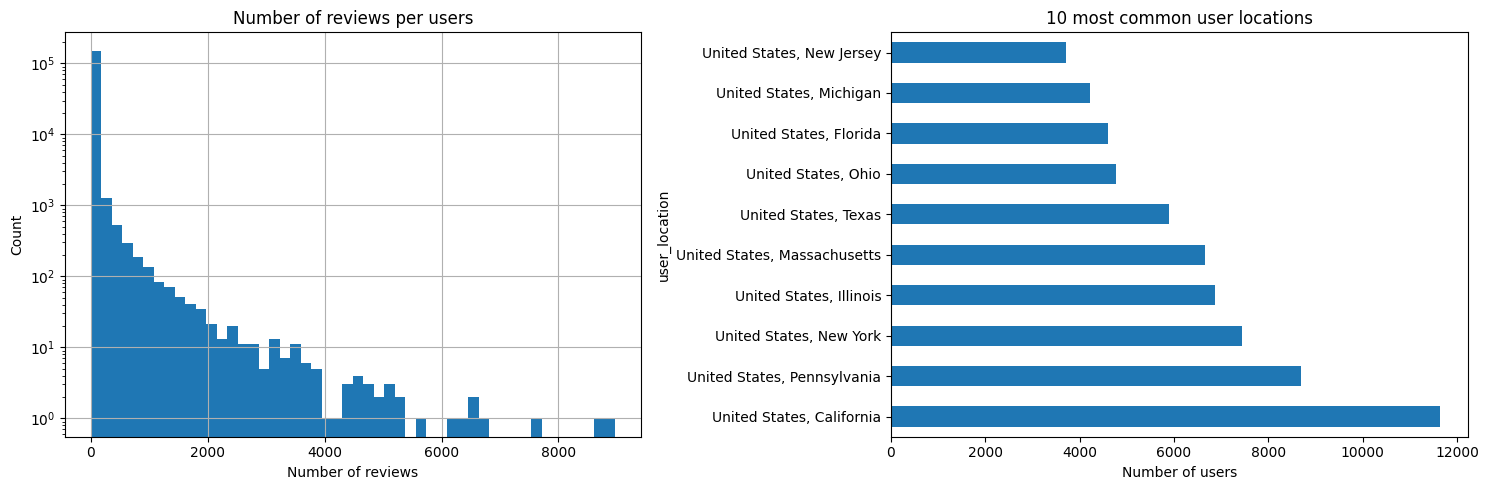

In [27]:
# Representation of reviews per user and most common user locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
users_filtered['user_nbr_reviews'].hist(bins=50, log=True)
plt.title('Number of reviews per users')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.subplot(1, 2, 2)
users_filtered['user_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common user locations')
plt.xlabel('Number of users')
plt.tight_layout()
plt.show()

<blockquote>

We observe that many users have no reviews at all, they will be removed from the dataset when merging. Also, the 10 most common user location are all in the US.

</blockquote>

#### 1.2.4 Reviews dataset 📝

In [28]:
display(reviews.sample(3))
print('Shape of reviews : ', reviews.shape)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
957290,Red Cap,82522,Kulshan Brewing Company,28281,American Amber / Red Ale,5.5,1421233200,Moose90,moose90.704894,3.0,2.75,3.0,2.0,2.0,2.34,"A – Pours a deep ruby red hue, foamy tan color..."
1956889,Shipyard Pumpkinhead Ale,1932,Shipyard Brewing Co.,139,Pumpkin Ale,4.7,1191492000,Murchmac,murchmac.64050,3.0,3.50,3.5,3.5,4.0,3.57,This is the light beers of pumpkin beers.Smell...
2116938,Dark Horse Double Crooked Tree IPA,22381,Dark Horse Brewing Company,1471,American Double / Imperial IPA,12.0,1222423200,russpowell,russpowell.19986,4.5,4.50,4.5,4.5,4.5,4.50,"got this one from czoch75, cheers Clint! Pours..."


Shape of reviews :  (2589586, 16)


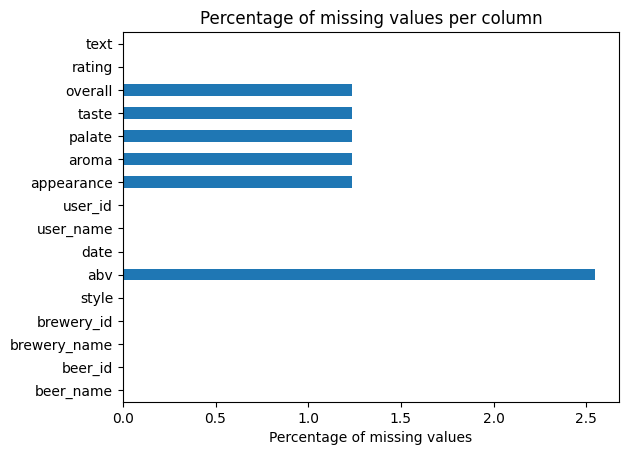

abv                      : 65983 missing values (2.55%)
user_name                :     3 missing values (0.00%)
appearance               : 32009 missing values (1.24%)
aroma                    : 32009 missing values (1.24%)
palate                   : 32009 missing values (1.24%)
taste                    : 32009 missing values (1.24%)
overall                  : 32009 missing values (1.24%)
text                     :     2 missing values (0.00%)


In [29]:
show_missing(reviews)

In [30]:
# making sure that all the missing values of the rating aspects are in the same rows

# print the number of rows that contains a NaN value for each column ['overall', 'taste', 'palate', 'aroma', 'appearance']
print('Number of rows with NaN values for each column :')
for col in ['overall', 'taste', 'palate', 'aroma', 'appearance']:
    print(col, ':', len(reviews[reviews[col].isna()]))
    
print()
# print the number of rows that contains a NaN value for all the rating aspects
missing_values = reviews[['overall', 'taste', 'palate', 'aroma', 'appearance']].isna()
missing_values['all_missing'] = missing_values.all(axis=1)
print(missing_values['all_missing'].value_counts())

Number of rows with NaN values for each column :
overall : 32009
taste : 32009
palate : 32009
aroma : 32009
appearance : 32009

all_missing
False    2557577
True       32009
Name: count, dtype: int64


<blockquote>

All the missing values are in the same rows, and they represent less than 1.5% of the dataset. We can drop them.

</blockquote>

In [31]:
# remove the columns that are not useful for our analysis
reviews_filtered = reviews.drop(columns=['user_name', 'beer_name', 'brewery_name']).copy(deep=True)

# remove the column abv because we have the information in the beers dataframe
reviews_filtered.drop(columns=['abv'], inplace=True)

#remove rows in reviews_filtered that have all_missing True in missing_values
reviews_filtered = reviews_filtered[~missing_values['all_missing']].copy(deep=True)

#remove the two reviews that have no text
reviews_filtered = reviews_filtered[~reviews_filtered['text'].isna()].copy(deep=True)

display(reviews_filtered.sample(3))
print('Shape of reviews_filtered : ', reviews_filtered.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text
1715030,6260,64,Pumpkin Ale,1349431200,mschind.92124,3.50,4.00,3.50,4.0,4.0,3.92,"This is the 2012 batch of Punk, grabbed a four..."
289007,2011,4686,Märzen / Oktoberfest,1128592800,hardtarget.1712,3.00,3.50,3.00,3.5,4.0,3.52,"Bottle Inspection: Date code, green 12 oz bott..."
2067068,19960,1199,American Double / Imperial Stout,1429524000,navygoat.952085,4.75,4.75,4.75,5.0,5.0,4.90,A friend gave me a bottle of KBS to try; oh bo...


Shape of reviews_filtered :  (2557575, 12)


In [32]:
show_missing(reviews_filtered)

There are no missing values in this dataset.


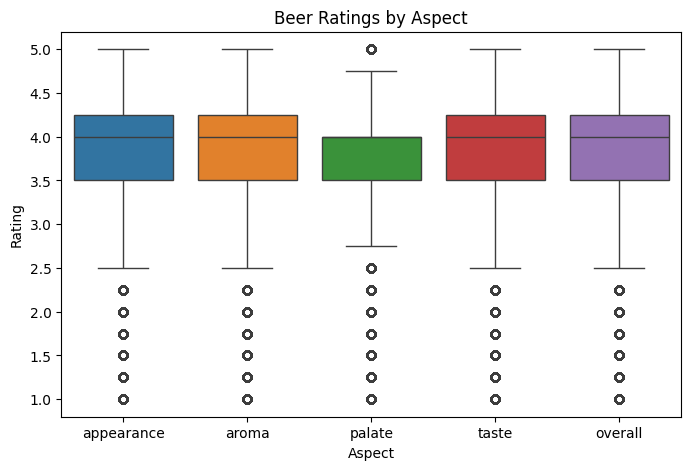

In [33]:
# boxplot for each rating column, appearance, aroma, palate, taste and overall

plt.figure(figsize=(8, 5))
sns.boxplot(data=reviews_filtered[['appearance', 'aroma', 'palate', 'taste', 'overall']])
plt.title('Beer Ratings by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Rating')
plt.show()

### 1.3 Merge datasets 🔗

In [34]:
# Merge reviews with users and beers and breweries
df_merged = reviews_filtered.merge(beers_filtered, how='left', on=['beer_id', 'brewery_id', 'style'])
df_merged = df_merged.merge(users_filtered, how='left', on='user_id')
df_merged = df_merged.merge(breweries_filtered, how='left', on='brewery_id')

display(df_merged.sample(1))
print('Shape of df_merged : ', df_merged.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers
2447220,34306,15237,Quadrupel (Quad),1258801200,blackhaddock.90923,4.0,4.0,4.5,4.5,4.5,4.35,"Brown 33cl bottle (2007 version, PNP No4) obta...",2396,839,4.33,10.0,3050,3050,1.154686e+09,England,Belgium,145


Shape of df_merged :  (2557575, 22)


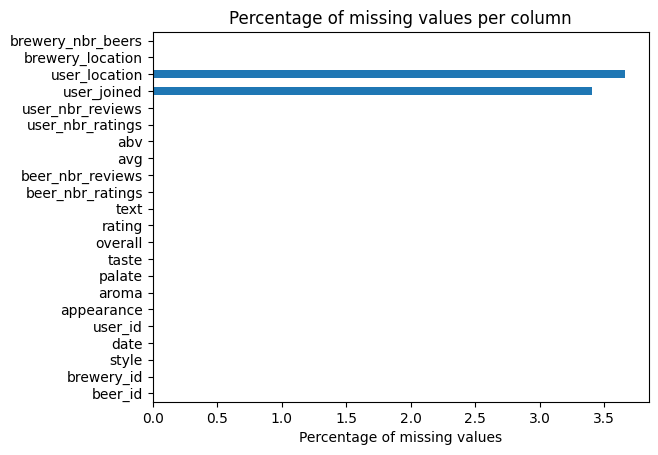

user_joined              : 87150 missing values (3.41%)
user_location            : 93668 missing values (3.66%)


In [35]:
show_missing(df_merged)

In [36]:
# We can replace missing user_joined values with the date of the first review of the user
df_merged['first_review'] = df_merged.groupby('user_id')['date'].transform('min')
df_merged['user_joined'] = df_merged['user_joined'].fillna(df_merged['first_review'])
df_merged.drop(columns=['first_review'], inplace=True)

> We have an almost complete dataset. Only information about the location of users is missing for 3.66% reviews.

In [37]:
# Save to csv
df_merged.to_csv(dataset_path + 'BeerAdvocateMerged.csv', index=False)

## 2. Data enrichment 🍺

In [2]:
# load csv from step 1
df = pd.read_csv(dataset_path + 'BeerAdvocateMerged.csv')

In [3]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,abv,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers
1746133,138735,13014,American IPA,7.2,1416654000,markcp.731665,4.25,4.75,5.00,4.50,4.50,4.60,"From a can. Pours hazy, golden orange. Head ...",2367,397,4.45,663,39,1.367921e+09,"United States, Iowa","United States, Minnesota",166
2099902,110407,9629,American Stout,6.6,1469527200,tripel_threat.815523,4.50,4.25,3.75,4.00,4.00,4.07,"Deep and rich, velvety black in color with a t...",30,8,3.87,613,591,1.404036e+09,"United States, Michigan","United States, Michigan",449
1100339,147,45,English India Pale Ale (IPA),6.9,1423652400,kegjeff.942736,4.00,4.00,4.75,4.75,4.75,4.53,"I went all in with this beer, buying a half ke...",2468,986,3.65,2,1,1.423652e+09,"United States, New Jersey","United States, New York",181


Shape of df :  (2557577, 22)


### 2.1 Serving style 🍾🥤🚰

#### 2.1.1 naive approach

>Since our goal is to look at the influence of the serving style, we need to know how each beer was served.   
A first idea was to use a naive approach. We only look at whether a word specific to as service style has been used. 

In [4]:
def serving_type_naive(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a new column serving_type_naive that contains the serving type of the beer using the naive approach.

    Parameters:
    - df (pd.DataFrame): The input dataframe.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_naive' column.
    """
    # Create 3 different columns according to the text review, "bottle", "can", "draft"
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans', }
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler', 'keg'}
    
    # Create different columns if review text contains the word
    df['bottle'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in bottle))
    df['can'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in can))
    df['draft'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in draft))
    
    # Initialize the serving_type_naive column to 'not_set' with dtype str
    df['serving_type_naive'] = 'not_set'
    df['serving_type_naive'] = df['serving_type_naive'].astype(str)
    
    # if there are more than one true or no true, set the value to 'unknown'
    df.loc[df[['bottle', 'can', 'draft']].sum(axis=1) != 1, 'serving_type_naive'] = 'unknown'

    # drop the columns bottle, can, and draft
    df.drop(['bottle', 'can', 'draft'], axis=1, inplace=True)
    
    return df

#### 2.1.2 Similarity 🍾🥤🚰

> Compute the similarity between the reviews and a list of words specific to each serving style. The list is more exhaustive in this method, using words such as aluminium or cork for can and bottle respectively. Select the serving style with the highest similarity.

In [5]:
def serving_type_sim(df: pd.DataFrame, word_bottle: str = 'data/bottle.txt', word_can: str = 'data/can.txt', word_draft: str = 'data/draft.txt', threshold: float = 0.05) -> pd.DataFrame:
    """
    Compute the cosine similarity between the review text and the list of words for each serving type. 
    Select the serving type with the highest similarity score.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - word_bottle (str): Path to the text file containing words related to 'bottle' serving type.
    - word_can (str): Path to the text file containing words related to 'can' serving type.
    - word_draft (str): Path to the text file containing words related to 'draft' serving type.
    - threshold (float): The threshold for considering a serving type based on cosine similarity.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_sim' column.
    """
    # Read the list of words from the text file
    with open(word_can, 'r') as file:
        word_can = file.read().splitlines()

    with open(word_bottle, 'r') as file:
        word_bottle = file.read().splitlines()

    with open(word_draft, 'r') as file:
        word_draft = file.read().splitlines()

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Transform the review and words list using TF-IDF
    tfidf_matrix = vectorizer.fit_transform(df['text'].astype(str))

    can_vector = vectorizer.transform([" ".join(word_can)])
    bottle_vector = vectorizer.transform([" ".join(word_bottle)])
    draft_vector = vectorizer.transform([" ".join(word_draft)])

    # Calculate the cosine similarity
    cosine_sim_can = cosine_similarity(tfidf_matrix, can_vector)
    cosine_sim_bottle = cosine_similarity(tfidf_matrix, bottle_vector)
    cosine_sim_draft = cosine_similarity(tfidf_matrix, draft_vector)

    # Get the maximum similarity score and corresponding serving type
    max_sim = np.maximum.reduce([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft])
    serving_type = np.where(max_sim >= threshold, np.array(['bottle', 'can', 'draft'])[np.argmax([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft], axis=0)], 'unknown')

    # Add the serving_type_sim column to the dataframe
    df['serving_type_sim'] = serving_type

    return df

#### 2.1.3 Rule-based approach 🍾🥤🚰

> Homemade algorithm used to find the serving type using a rule-based approach.

In [17]:
nlp = spacy.load("en_core_web_sm")
from spacy.tokens import Doc

def differentiate_can(doc: Doc) -> List[str]:
    """
    Differentiate between the noun and verb form of the word "can" in the review text.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - List[str]: A list indicating whether each occurrence of "can" is used as a noun or a verb.
    """
    verbes_nom = []
    for token in doc:
        if token.text.lower() == "can" and any(t.dep_ == "aux" for t in token.head.children):
            verbes_nom.append("verb")
        elif token.text.lower() == "can":
            verbes_nom.append("noun")

    return verbes_nom

def remove_conditional(doc: Doc) -> Doc:
    """
    Remove parts of the review text that are in the conditional form.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - spacy.tokens.Doc: The modified SpaCy Doc object with conditional parts removed.
    """
    modified_tokens = []
    remove_sentence = False

    for sent in doc.sents:
        for token in sent:
            if remove_sentence:
                continue
            if token.text.lower() in {"would", "could", "'d", "will"}:
                subtree = [t.text for t in token.subtree]
                modified_tokens.extend(subtree[:-1])
                remove_sentence = True
            else:
                modified_tokens.append(token.text)

    modified_text = " ".join(modified_tokens)

    return nlp(modified_text)

def extract_serving_style(review: str) -> str:
    """
    Return the serving style of the beer using the rule-based approach.

    Parameters:
    - review (str): The input text of the beer review.

    Returns:
    - str: The serving style of the beer.
    """
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans'}
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler'}

    modified_doc = remove_conditional(nlp(review))
    #modified_doc = nlp(review)

    serving_styles = set()

    if any(word in modified_doc.text.lower() for word in bottle):
        serving_styles.add("bottle")
    if any(word in modified_doc.text.lower() for word in can) and "noun" in differentiate_can(modified_doc):
        serving_styles.add("can")
    if any(word in modified_doc.text.lower() for word in draft):
        serving_styles.add("draft")

    serving_style = serving_styles.pop() if len(serving_styles) == 1 else 'unknown'

    return serving_style

def process_row(row: pd.Series) -> str:
    """
    Process a row of a DataFrame, extracting the serving style of the beer from the 'text' column.

    Parameters:
    - row (pd.Series): A row of a DataFrame containing a 'text' column.

    Returns:
    - str: The serving style of the beer.
    """
    serving_style = extract_serving_style(row.text)
    return serving_style

def serving_type_rulebased(df: pd.DataFrame) -> pd.DataFrame:
    """
    Apply the rule-based serving type extraction function to each row of the DataFrame in parallel.

    Parameters:
    - df (pd.DataFrame): The input dataframe.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_rulebased' column.
    """
    # Number of threads to run in parallel (adjust based on your system)
    num_threads = 6
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Apply the function in parallel to each row of the DataFrame
        results = list(tqdm(executor.map(process_row, df.itertuples(index=False)), total=len(df)))

    # Add the results to the DataFrame
    df['serving_type_rulebased'] = results
    
    return df

> This function is quite simple and we will try to adapt it further in Milestone P3. On the test performed below on the hand-labeled dataset, we applied this function to extract the serving styles. We first did it without the ```remove_conditional``` function, and it took 2.6s for an accuracy of 91.2%. With the function, it took 4.5s for an accuracy of 91.6%. Therefore, the choice was made to not use the function as it almost doubled runtime.

#### 2.1.4 Test on sample df

<blockquote>

To test which method performed best to retrieve the serving style of a beer, we manually labelled 250 reviews sampled randomly on the merged dataset. Each member of the group labelled 50 reviews as "unknown", "draft", "can" or "bottle".<break>


The goal was to learn more about the reviews, and find pattern that could help us for the rule-based method. After a few reviews, we added some words related to draft for example.


</blockquote>

##### 2.1.4.1 Obtain a df with true serving types

In [8]:
#250 reviews for function evaluation (manually labelled)
df_eval = df.sample(n=250, random_state=46).copy(deep=True)
df_eval['true_serving_type'] = 'not_set'

In [9]:
df_eval['true_serving_type'].value_counts()

true_serving_type
not_set    250
Name: count, dtype: int64

In [45]:
# Function used to display a review and label the serving style
#idx = display_review(df_eval)
#df_eval = update_review_serving_type(df_eval, idx)

In [10]:
# df_eval.to_csv('data/BeerAdvocateEval.csv', index=False)
df_eval = pd.read_csv('data/BeerAdvocateEval.csv')

In [11]:
# Distribution of the serving types in the evaluation set
df_eval['true_serving_type'].value_counts()

true_serving_type
unknown    141
bottle      82
draft       20
can          7
Name: count, dtype: int64

##### 2.1.4.2 Call each function and evaluate (time and accuracy)

In [48]:
display(df_eval.sample(3))

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,true_serving_type
187,64220,6288,American Wild Ale,1346407200,viciousknishs.401136,3.5,3.5,4.0,4.0,3.5,3.75,A- pours a murky brown with a tan head.S- smel...,59,22,3.73,5.2,390,320,1.260097e+09,"United States, Virginia",Belgium,132,unknown
85,299,96,Fruit / Vegetable Beer,1290855600,leokbelo.88223,4.5,4.0,3.0,3.5,4.5,3.83,Pours a hazy copper with a 1 1/2 inch foamy he...,5692,1703,3.40,5.1,146,87,1.152698e+09,"United States, Florida","United States, Vermont",139,unknown
156,42312,10321,American Pale Ale (APA),1344938400,smakawhat.204323,3.5,2.0,3.0,3.5,2.0,2.79,Poured from the can into a nonic pint glass. U...,215,120,3.80,5.0,3950,3869,1.205838e+09,"United States, Maryland",Canada,120,can


In [12]:
t1 = time.time()
df_eval = serving_type_naive(df_eval)
t_naive = time.time() - t1
print(f"Naive method took {t_naive} seconds")

print('Naive method accuracy:', compute_accuracy(df_eval['serving_type_naive'], df_eval['true_serving_type']))

Naive method took 0.029276132583618164 seconds
correct_count: 113, total_count: 250
Naive method accuracy: 0.452


In [50]:
t1 = time.time()
df_eval = serving_type_sim(df_eval, threshold=0.03)
t_sim = time.time() - t1
print(f"Similarity method took {t_sim} seconds")

print('Similarity method accuracy:', compute_accuracy(df_eval['serving_type_sim'], df_eval['true_serving_type']))

Similarity method took 0.04380178451538086 seconds
correct_count: 161, total_count: 250
Similarity method accuracy: 0.644


In [18]:
t1 = time.time()
df_eval = serving_type_rulebased(df_eval)
t_rulebased = time.time() - t1
print(f"Rulebased method took {t_rulebased} seconds")

print('Rulebased method accuracy:', compute_accuracy(df_eval['serving_type_rulebased'], df_eval['true_serving_type']))

  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [00:17<00:00, 14.16it/s]

Rulebased method took 17.729158401489258 seconds
correct_count: 228, total_count: 250
Rulebased method accuracy: 0.912


In [20]:
#print one random misidentified review
df_misclassified = df_eval[df_eval['serving_type_rulebased'] != df_eval['true_serving_type']].copy(deep=True)
for index, row in df_misclassified.sample(1).iterrows():
    print(f"Review {index}:\n{row['text']}\nRule-based serving type: {row['serving_type_rulebased']}\nTrue serving type: {row['true_serving_type']}\n")
    print(differentiate_can(nlp(row['text'])))

Review 118:
I drink this regularly on tap at the pub. It's probably a little biased.A: Very clear with a nice copper hue. When I've had it out of a growler or bottle, it always has some nice head that dissipates after a while.S: Tons of hops, citrus and pine.T: Upfront hops with lots of citrus and pine in the background. Very clean finish that doesn't leave you with any odd tastes. Follows the nose down to the T.M: Smooth and medium bodied. Always the right amount of carbonation.O: This is my go to when I'm looking for a beer on tap. I visit the pub at least once a month. Always go for my 1-2 punch. PtE followed by a Row 2 with a Lola pizza. Always fills the craving.
Rule-based serving type: unknown
True serving type: draft

[]


> It is quite clear that the rulebased method is the best one. It takes longer to run, but the accuracy gain is worth it. We will use this method to classify the reviews between the 3 serving styles. By exploring the reviews that get classified as ```unknown``` we realize that the main reason is that they contain two or more serving styles, so in Milestone P3 our objective is to adapt further the classification to solve this problem. An idea could be to perform a temporal analysis or to use the ```remove_conditional``` function. However, this will negatively impact run time.

In [21]:
# Classification of serving type on the whole dataset
#### 8h run-time
# df = serving_type_rulebased(df)
df = pd.read_csv(dataset_path + 'BA_classified.csv')

> The extraction took 14h on a recent MacAir with an 8 cores CPU. With our previous estimations on run time, using the ```remove_conditional``` function would have taken 30h. We will try to adapt the function ```extract_serving_style``` by adding new rules, based on the different tenses of the sentences. As explained before, there is a big potential to reduce less the dataset (have less 'unknown' samples) if we manage to extract the style in reviews which have 2 serving styles present. Therefore, we know for a fact that these reviews contain the true serving style, which we will try to retrieve. The additional rules that we plan to use based on the tense of the sentences will probably increase this number a lot too, so we might need to use an online GPU solution.

In [54]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased
536827,92,43153,American Strong Ale,1484737200,boo-urns.1102971,4.25,4.5,4.5,4.5,4.75,4.54,Wow! Big head thstbdissapent. Strong fruity sm...,10597,3066,4.17,7.2,538,15,1.454411e+09,Canada,"United States, California",41,unknown
2027628,48911,1199,Fruit / Vegetable Beer,1274436000,aasher.420668,4.00,4.0,3.0,4.5,3.50,4.00,"Appearance: Pours a ruby red, similar to the p...",1502,605,3.63,6.5,3570,1073,1.264590e+09,"United States, Indiana","United States, Michigan",399,unknown
1885206,71806,17981,American Double / Imperial Stout,1489402800,deebo.102660,4.25,4.0,4.0,4.0,4.00,4.02,O-a nice variant but not as robust for me as t...,253,53,4.48,11.0,927,572,1.160734e+09,"United States, Minnesota","United States, Florida",981,unknown


Shape of df :  (2557575, 23)


### 2.2 Data filtering 🧹
Since our analysis will be focused on the serving style, we will remove all reviews where no serving style was identified. 

<div class="alert alert-block alert-warning">
<b>Alert:</b> By doing so, we are reducing our dataset by more than half. We will need to check in P3 if our dataset is still representative of the initial one. 
</div>

In [22]:
# count the number of reviews for each serving_type_rulebased
print(df['serving_type_rulebased'].value_counts(normalize=False))

# percentage of unknown serving type
print('Percentage of unknown serving type:', round(df['serving_type_rulebased'].value_counts(normalize=True)['unknown']*100, 2), '%')

serving_type_rulebased
unknown    1473892
bottle      780261
draft       245501
can          57921
Name: count, dtype: int64
Percentage of unknown serving type: 57.63 %


In [23]:
# drop rows where serving_type_rulebased is unknown
df = df[df['serving_type_rulebased'] != 'unknown'].copy(deep=True)

### 2.3 Sentiment analysis 📝

<blockquote>

In this part of the notebook, we tried to assess whether a review was on the positive or negative side with a polarity analysis. We also looked at subjectivity.
If a serving style appears to have statistically higher ratings than another, we could look if the polarity of the reviews reaches the same conclusion.

</blockquote>

In [57]:
#df = sentiment_analysis(df)
#df.to_csv(dataset_path + 'BA_sentiment.csv', index=False)
df = pd.read_csv(dataset_path + 'BA_sentiment.csv')

In [58]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity
1050583,27226,10557,Witbier,1209290400,ccrida.80807,4.0,4.0,4.0,4.5,4.5,4.30,750 ml bottle dated 12 May 07 on the wrapper (...,136,70,4.02,7.0,2242,2203,1.148638e+09,"United States, Oregon",Belgium,26,bottle,0.228074,0.526641
158874,1402,184,Quadrupel (Quad),1132916400,canucklehead.1700,4.5,4.0,4.0,4.5,4.0,4.23,The last time this beer was available in BC it...,2333,948,4.12,10.0,1780,1646,1.047035e+09,Canada,Netherlands,20,bottle,0.255952,0.408333
702175,21466,64,Fruit / Vegetable Beer,1312797600,oline73.371504,3.5,3.0,4.0,4.0,3.5,3.63,Poured from a bottle into a snifter. This was ...,1297,564,3.68,18.0,6302,1511,1.253268e+09,"United States, Maryland","United States, Delaware",378,bottle,0.184861,0.502778


Shape of df :  (1083683, 25)


### 2.4 Readability score 📖

> In this step, we checked the readability score of the review. This might not be necessary but it was still interesting to compare which ratings had higher readability score.

In [2]:
#df = compute_readability(df)
#df.to_csv(dataset_path + 'BA_readability.csv', index=False)
df = pd.read_csv(dataset_path + 'BA_readability.csv')

In [3]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity,readability_score
360547,87,147,American Pale Ale (APA),1317981600,mattyg85.497925,4.0,4.00,4.00,4.0,4.0,4.00,Poured from 12 oz. bottle into a Sam Adams per...,2710,984,3.89,5.4,2236,2095,1.283249e+09,"United States, Minnesota","United States, California",671,bottle,0.370833,0.615208,87.52
346212,211565,147,American Double / Imperial Stout,1457866800,augustgarage.139277,3.5,3.25,4.25,4.0,4.0,3.82,Poured from a 22oz bomber into my Portsmouth t...,525,134,4.10,9.2,1105,1070,1.179655e+09,"United States, California","United States, California",671,bottle,0.261528,0.670556,46.61
984667,3840,1416,American Barleywine,1328958000,buffs9.215322,4.0,3.00,4.00,3.0,3.5,3.26,12oz bottle poured into Duvel tulip snifterA -...,905,420,3.85,10.4,343,52,1.209377e+09,"United States, Colorado","United States, Utah",89,bottle,0.077262,0.559147,1.10


Shape of df :  (1083683, 26)


### 2.5 Metrics udpdate 📊

> The metrics updated in this step will be compared with the previous ones (user_nbr_reviews, beer_nbr_reviews, avg). Since our dataset has been reduced by half, approximately half of the reviews were lost. We will check if our final dataset is still representative of the initial one by comparing the average rating of a beer before and after the filtering. 

In [24]:
# compute the number of valid reviews per user
df['user_nbr_reviews_computed'] = df.groupby('user_id')['user_id'].transform('count')

# compute the number of valid reviews per beer
df['beer_nbr_reviews_computed'] = df.groupby('beer_id')['beer_id'].transform('count')

# compute the avg rating per beer
df['beer_avg_computed'] = df.groupby('beer_id')['rating'].transform('mean')

In [2]:
# df.to_csv(dataset_path + 'BA_enriched.csv', index=False)
df = pd.read_csv(dataset_path + 'BA_enriched.csv')

In [3]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity,readability_score,user_nbr_reviews_computed,beer_nbr_reviews_computed,beer_avg_computed
767361,2740,860,Fruit / Vegetable Beer,1376042400,garthdanielson.522584,3.75,4.0,2.75,3.0,3.0,3.26,"Poured on-tap and served in a tumbler pint, th...",80,29,3.58,6.5,3758,3562,1.289041e+09,"United States, Virginia","United States, Vermont",113,draft,0.117273,0.534545,73.68,3237,13,3.517692
830771,794,287,American Amber / Red Ale,1441792800,dbl_delta.695501,3.75,4.0,3.75,4.0,4.0,3.96,Bottle dated &quot;pkgd 11/5/14&quot; so this ...,3117,969,3.85,5.8,728,584,1.348308e+09,"United States, Pennsylvania","United States, Michigan",312,bottle,0.194872,0.444872,61.93,479,327,3.812936
431346,89,33,English India Pale Ale (IPA),1292670000,satchboogie.515021,4.00,3.0,4.00,4.0,5.0,3.96,22oz bomber poured into a pint glassbest by 4/...,733,331,3.88,5.8,1891,344,1.287223e+09,"United States, New Hampshire","United States, Massachusetts",99,bottle,0.174382,0.483639,72.36,287,160,3.923062


Shape of df :  (1083683, 29)


### 2.6 Countries grouping 🌍

In [80]:
# Group the countries by world region
countries = pd.read_csv('data/countries_region.csv')[['name', 'sub-region']]
countries.sample(3)

,name,sub-region
49,Comoros,Sub-Saharan Africa
178,Portugal,Southern Europe
119,"Korea, Republic of",Eastern Asia


In [81]:
# add a column user_country with the country of the user
df['user_location'] = df['user_location'].fillna('Unknown')
df['user_country'] = df['user_location'].apply(lambda x: 'United States of America' if 'United States, ' in x else x)

df.sample(1)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity,readability_score,user_nbr_reviews_computed,beer_nbr_reviews_computed,beer_avg_computed,user_country
579911,88269,1924,American Porter,1357038000,i_love_beer.710797,4.0,4.0,3.0,3.5,4.0,3.7,Poured from a 12oz bottle into a wheat beer gl...,2545,412,3.76,6.5,3,3,1.357038e+09,Unknown,"United States, Maryland",150,bottle,0.29463,0.596852,48.85,2,155,3.724387,Unknown


In [97]:
# rename or add country with names different than in user_country

# rename the column of countries that cause problems 
def rename_countries(old_name, new_name):
    countries['name'] = countries['name'].replace(old_name, new_name)
    return

rename_countries('Bolivia (Plurinational State of)', 'Bolivia')
rename_countries('Tanzania, United Republic of', 'Tanzania')
rename_countries('South Georgia and the South Sandwich Islands', 'South Georgia and South Sandwich Islands')
rename_countries('Fiji', 'Fiji Islands')
rename_countries('New Zealand', 'Aotearoa')
rename_countries('Taiwan, Province of China', 'Taiwan')
rename_countries('North Macedonia', 'Macedonia')
rename_countries('Viet Nam', 'Vietnam')
rename_countries('Russian Federation', 'Russia')
rename_countries('Czechia', 'Czech Republic')
rename_countries('Slovakia', 'Slovak Republic')
rename_countries('Svalbard and Jan Mayen', 'Svalbard and Jan Mayen Islands')

new_countries = pd.DataFrame({'name': ['England', 'Wales', 'Northern Ireland', 'Scotland', 'Unknown'], 'sub-region': ['Northern Europe','Northern Europe','Northern Europe','Northern Europe', 'Unknown']})

countries = pd.concat([countries, new_countries]).drop_duplicates().reset_index(drop=True)

In [99]:
# add column user_subregion to df
df = df.merge(countries[['name', 'sub-region']], left_on='user_country', right_on='name', how='left')
df.rename(columns={'sub-region': 'user_subregion'}, inplace=True)

df.sample(5)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,serving_type_rulebased,polarity,subjectivity,readability_score,user_nbr_reviews_computed,beer_nbr_reviews_computed,beer_avg_computed,user_country,name,user_subregion
811849,100310,28094,American Pale Wheat Ale,1431770400,bluejacket74.27421,3.50,3.5,3.50,3.25,3.50,3.40,"12 ounce can, no canning date that I could fin...",24,3,3.56,5.1,2766,2766,1.120471e+09,"United States, Ohio","United States, Ohio",32,can,0.132112,0.518672,83.46,2427,1,3.400000,United States of America,United States of America,Northern America
1020063,722,259,Tripel,1131966000,camrahardliner.3988,5.00,4.5,4.50,4.00,4.00,4.23,My bottle says 8%It pours a bright gold color ...,3153,1275,4.23,8.0,1114,1102,1.082628e+09,Unknown,Belgium,18,bottle,0.416667,0.608333,79.77,307,538,4.221022,Unknown,Unknown,Unknown
181786,210257,741,Maibock / Helles Bock,1461232800,chinchill.199175,3.25,3.5,3.75,3.75,3.75,3.66,"12 oz bottle, date stamped BB 10-Sept.-2016, s...",30,9,3.89,6.8,5347,5199,1.204283e+09,"United States, South Carolina","United States, Wisconsin",115,bottle,0.290833,0.581250,80.17,4357,2,3.955000,United States of America,United States of America,Northern America
468275,68148,14359,American Double / Imperial IPA,1302861600,plaid75.13103,4.00,4.0,4.00,4.00,4.00,4.00,On draft at the brewery. Poured a crystal clea...,8,1,3.94,8.0,3224,2520,1.105614e+09,"United States, New York","United States, New York",86,draft,0.183333,0.331667,77.23,837,1,4.000000,United States of America,United States of America,Northern America
1029180,4924,739,Lambic - Fruit,1227697200,masterski.113604,4.50,4.0,4.50,4.50,4.50,4.38,Busted upon a bottle for early Thanksgiving di...,481,249,4.22,7.0,3661,3589,1.167044e+09,Canada,Belgium,22,bottle,0.145179,0.436845,77.23,2464,133,4.249173,Canada,Canada,Northern America


In [100]:
df.user_subregion.value_counts()

user_subregion
Northern America                   1000022
Unknown                              36902
Northern Europe                      19284
Western Europe                       10070
Australia and New Zealand             8106
Southern Europe                       2881
Eastern Asia                          1839
Eastern Europe                        1454
Latin America and the Caribbean       1260
South-eastern Asia                     955
Sub-Saharan Africa                     506
Western Asia                           195
Southern Asia                           86
Central Asia                            38
Melanesia                               34
Polynesia                                4
Micronesia                               1
Name: count, dtype: int64

### 2.7 Beer styles grouping 🍻

In [5]:
# Group the beers by more general beer styles
# to be done in P3

## 3. Check representation of dataset
 *To be done in P3*

In [6]:
# Load the filtered dataset
filtered_df = df.copy(deep=True) 
filtered_df_beer = filtered_df.groupby('beer_id').agg({'beer_nbr_reviews':'mean', 'avg':'mean', 'beer_nbr_reviews_computed': 'mean', 'beer_avg_computed': 'mean'})
filtered_df_user = filtered_df.groupby('user_id').agg({'user_nbr_reviews':'mean','user_nbr_reviews_computed': 'mean'})


In [7]:
display(filtered_df_beer)

,beer_nbr_reviews,avg,beer_nbr_reviews_computed,beer_avg_computed
beer_id,,,,
4,10.0,3.64,6.0,3.530000
5,543.0,3.40,163.0,3.381840
6,1019.0,3.64,305.0,3.584328
7,811.0,3.20,241.0,3.193112
8,72.0,3.27,32.0,3.268438
...,...,...,...,...
293255,1.0,3.83,1.0,3.830000
293261,1.0,3.67,1.0,3.670000
293264,1.0,4.23,1.0,4.230000


In [8]:
display(filtered_df_user)

,user_nbr_reviews,user_nbr_reviews_computed
user_id,,
--dom--.709199,53.0,30.0
--weezl--.789708,3.0,2.0
-blast-tyrant-.1105240,1.0,1.0
-rick.912339,194.0,52.0
-royce-.998082,1.0,1.0
...,...,...
zythophile.1101219,184.0,136.0
zythus.301538,8.0,4.0
zz427.1113802,2.0,2.0


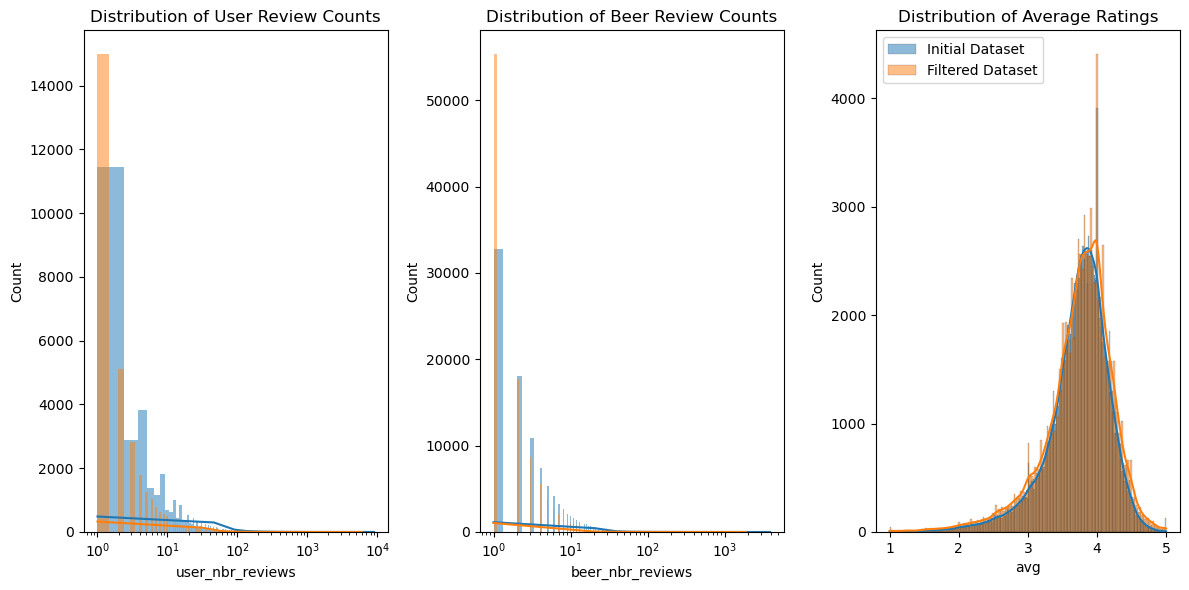

In [9]:
# Check the distribution of key columns to see if they are similar
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Distribution of User Review Counts
axes[0].set_title('Distribution of User Review Counts')
sns.histplot(filtered_df_user['user_nbr_reviews'], kde=True, ax=axes[0], label='Initial Dataset')
sns.histplot(filtered_df_user['user_nbr_reviews_computed'], kde=True, ax=axes[0], label='Filtered Dataset')
#axes[0].set_ylim([1e0, 25000])
axes[0].set_xscale('log')
#axes[0].set_yscale('log')

# Distribution of Beer Review Counts
axes[1].set_title('Distribution of Beer Review Counts')
sns.histplot(filtered_df_beer['beer_nbr_reviews'], kde=True, ax=axes[1], label='Initial Dataset')
sns.histplot(filtered_df_beer['beer_nbr_reviews_computed'], kde=True, ax=axes[1], label='Filtered Dataset')
#axes[1].set_ylim([1e0, 2000000])
axes[1].set_xscale('log')
#axes[1].set_yscale('log')

# Distribution of Average Ratings
axes[2].set_title('Distribution of Average Ratings')
sns.histplot(filtered_df_beer['avg'], kde=True, ax=axes[2], label='Initial Dataset')
sns.histplot(filtered_df_beer['beer_avg_computed'], kde=True, ax=axes[2], label='Filtered Dataset')

plt.tight_layout()
plt.legend()
plt.show()

In [10]:
# compare similar infos
t_stat, p_value = ttest_ind(filtered_df_beer['avg'], filtered_df_beer['beer_avg_computed'])
print("\nT-Test Results: Average Rating")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(filtered_df_user['user_nbr_reviews'], filtered_df_user['user_nbr_reviews_computed'])
print("\nT-Test Results: Number of user reviews ")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(filtered_df_beer['beer_nbr_reviews'], filtered_df_beer['beer_nbr_reviews_computed'])
print("\nT-Test Results: Number of beer reviews ")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Test Results: Average Rating
T-Statistic: -0.1407391103761723, P-Value: 0.8880761714411514

T-Test Results: Number of user reviews 
T-Statistic: 23.76025885009561, P-Value: 2.4622528061687613e-124

T-Test Results: Number of beer reviews 
T-Statistic: 36.7441592984133, P-Value: 1.0607180926185027e-294


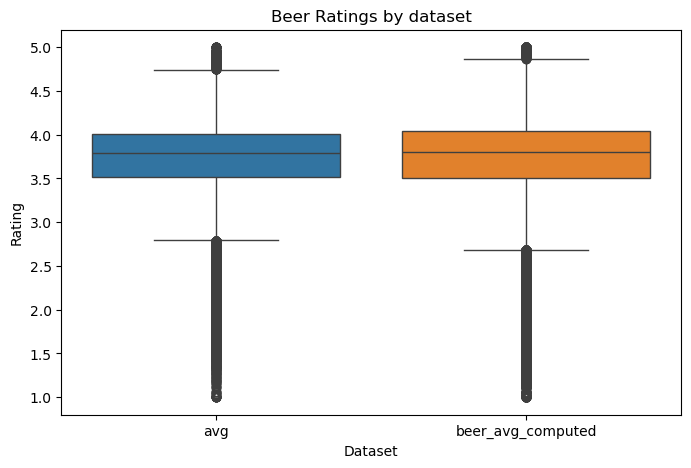

In [11]:
# box plot of the average rating per beer "avg" and the computed average rating per beer "beer_avg_computed" from df_filtered_beer
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df_beer[['avg', 'beer_avg_computed']])
plt.title('Beer Ratings by dataset')
plt.xlabel('Dataset')
plt.ylabel('Rating')
plt.show()


In [12]:
filtered_df_beer.describe()

,beer_nbr_reviews,avg,beer_nbr_reviews_computed,beer_avg_computed
count,113874.000000,113874.000000,113874.000000,113874.000000
mean,22.092954,3.726006,9.516509,3.726292
std,106.845562,0.457103,43.866467,0.509969
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.520000,1.000000,3.500000
50%,3.000000,3.790000,2.000000,3.801429
75%,9.000000,4.010000,4.000000,4.045000
max,3899.000000,5.000000,1881.000000,5.000000


<blockquote>

From these tests, we can see that the dataset is still representative of the initial one. The average rating of a beer is still the same, and the distribution of the ratings is also similar. We can therefore continue our analysis on this dataset.

However, as expected, we lost a lot of reviews, therefore the amount of reviews per beer is statistically significant from the initial amount of reviews per beer. 

We were not sure, if the same conclusion could be drawn for the amount of reviews per user, since some users might always give the serving style or never. At the end, we see that the distribution is still similar, but the amount of reviews per user is statistically significant from the initial amount of reviews per user. 

</blockquote>


## 4. Visualization 📊

> In this step, we just plotted some information, to make sure our intuition was correct. The detailed analysis will come in P3.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


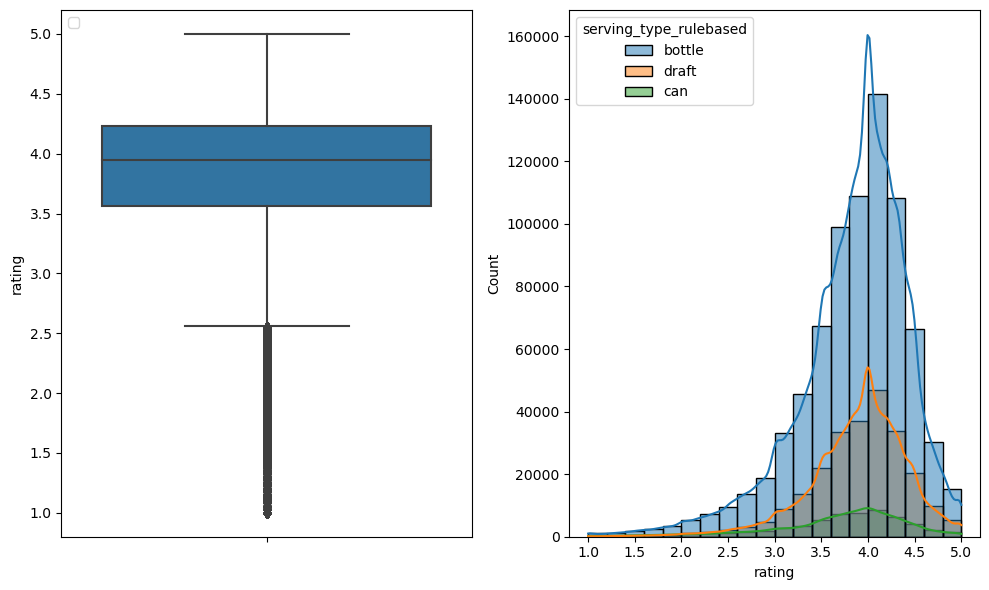

In [25]:
# show boxplot and histograms of ratings for bottle, can and draft
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(data=df, hue='serving_type_rulebased', y='rating')
plt.legend(loc='upper left')
plt.subplot(122)
sns.histplot(data=df, hue='serving_type_rulebased', x='rating', kde=True, bins=20)
plt.tight_layout()
plt.show()

## 5. Statistical Analysis 📈

### 5.1 Measure the impact of each aspect on rating 📏
> First draft analysis to look which aspect has more impact on the rating. We will continue this analysis in P3.

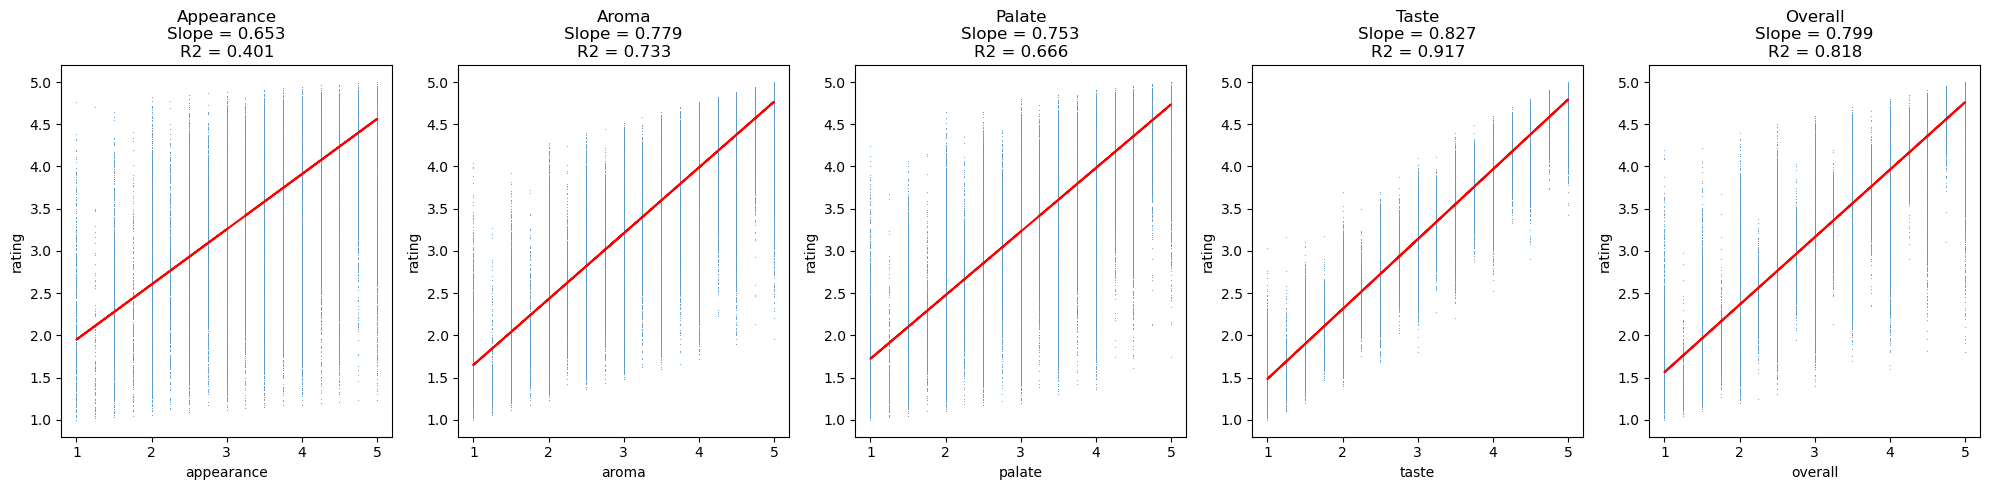

In [26]:
# fit a linear regression line to the data for all 5 aspects
reg1 = LinearRegression().fit(df[['appearance']], df['rating'])
reg2 = LinearRegression().fit(df[['aroma']], df['rating'])
reg3 = LinearRegression().fit(df[['palate']], df['rating'])
reg4 = LinearRegression().fit(df[['taste']], df['rating'])
reg5 = LinearRegression().fit(df[['overall']], df['rating'])

# create subplots for all 5 aspects
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# plot the data and regression line for each aspect
sns.scatterplot(data=df, x='appearance', y='rating', s=0.5, ax=axs[0])
axs[0].plot(df[['appearance']], reg1.predict(df[['appearance']]), color='red')
axs[0].set_title('Appearance\nSlope = ' + str(round(reg1.coef_[0], 3)) + '\nR2 = ' + str(round(reg1.score(df[['appearance']], df['rating']), 3)))

sns.scatterplot(data=df, x='aroma', y='rating', s=0.5, ax=axs[1])
axs[1].plot(df[['aroma']], reg2.predict(df[['aroma']]), color='red')
axs[1].set_title('Aroma\nSlope = ' + str(round(reg2.coef_[0], 3)) + '\nR2 = ' + str(round(reg2.score(df[['aroma']], df['rating']), 3)))

sns.scatterplot(data=df, x='palate', y='rating', s=0.5, ax=axs[2])
axs[2].plot(df[['palate']], reg3.predict(df[['palate']]), color='red')
axs[2].set_title('Palate\nSlope = ' + str(round(reg3.coef_[0], 3)) + '\nR2 = ' + str(round(reg3.score(df[['palate']], df['rating']), 3)))

sns.scatterplot(data=df, x='taste', y='rating', s=0.5, ax=axs[3])
axs[3].plot(df[['taste']], reg4.predict(df[['taste']]), color='red')
axs[3].set_title('Taste\nSlope = ' + str(round(reg4.coef_[0], 3)) + '\nR2 = ' + str(round(reg4.score(df[['taste']], df['rating']), 3)))

sns.scatterplot(data=df, x='overall', y='rating', s=0.5, ax=axs[4])
axs[4].plot(df[['overall']], reg5.predict(df[['overall']]), color='red')
axs[4].set_title('Overall\nSlope = ' + str(round(reg5.coef_[0], 3)) + '\nR2 = ' + str(round(reg5.score(df[['overall']], df['rating']), 3)))

plt.tight_layout()
plt.show()

# should still add confidence intervals

> It seems like Taste as the biggest impact on the rating while appearance has the least impact.

### 5.2 Hypothesis testing on the new labels

In [68]:
def do_ttest(type1: str, type2: str, category: str) -> None:
    """
    Perform a t-test on the two samples of the given category for the given serving types.
    
    Parameters:
    - type1 (str): The first serving type.
    - type2 (str): The second serving type.
    - category (str): The category to perform the t-test on.

    """
    ttest = ttest_ind(df[df['serving_type_rulebased'] == type1][category],df[df['serving_type_rulebased'] == type2][category])
    if ttest[1] > 0.05:
        print('The p-value is high (' + str(ttest[1]) + '), so we cannot reject the null hypothesis that the two samples have the same average')
    else:
        print('The p-value is very low (' + str(ttest[1]) + '), so we can reject the null hypothesis that the two samples have the same average')

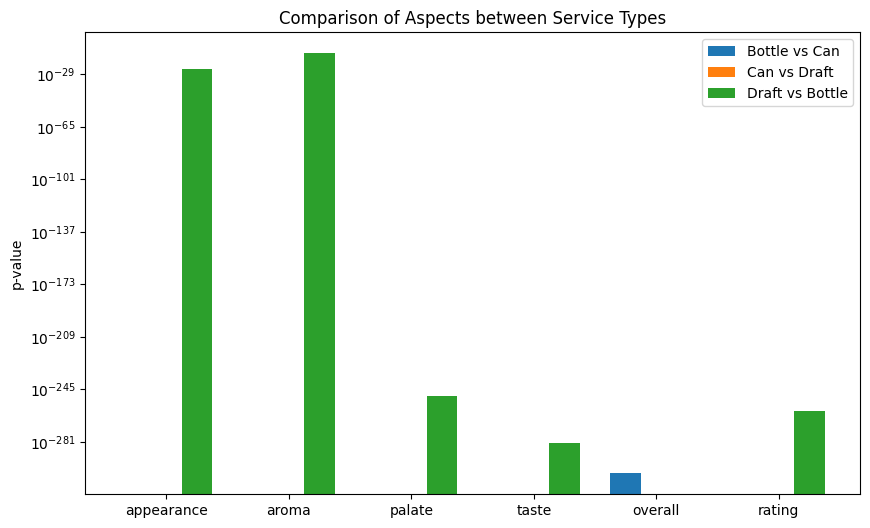

In [69]:
# compare each aspect between all three serving types

# define the columns to compare
columns = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

# create an empty matrix to store the p-values
p_values = np.zeros((len(columns), 3))

# perform the t-test and store the p-values in the matrix
for i in range(len(columns)):
    ttest1 = ttest_ind(df[df['serving_type_rulebased'] == 'bottle'][columns[i]], df[df['serving_type_rulebased'] == 'can'][columns[i]])
    ttest2 = ttest_ind(df[df['serving_type_rulebased'] == 'can'][columns[i]], df[df['serving_type_rulebased'] == 'draft'][columns[i]])
    ttest3 = ttest_ind(df[df['serving_type_rulebased'] == 'draft'][columns[i]], df[df['serving_type_rulebased'] == 'bottle'][columns[i]])
    p_values[i][0] = ttest1[1]
    p_values[i][1] = ttest2[1]
    p_values[i][2] = ttest3[1]

# create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(columns))
width = 0.25
rects1 = ax.bar(x - width, p_values[:,0], width, label='Bottle vs Can')
rects2 = ax.bar(x, p_values[:,1], width, label='Can vs Draft')
rects3 = ax.bar(x + width, p_values[:,2], width, label='Draft vs Bottle')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(columns)
ax.set_ylabel('p-value')
ax.set_title('Comparison of Aspects between Service Types')
ax.legend()
plt.show()

> All the p-values are below 0.05, so we can reject the null hypothesis and conclude that there is a significant difference between the groups.

C:\Users\victo\AppData\Local\Temp\ipykernel_2496\1834654910.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(151)


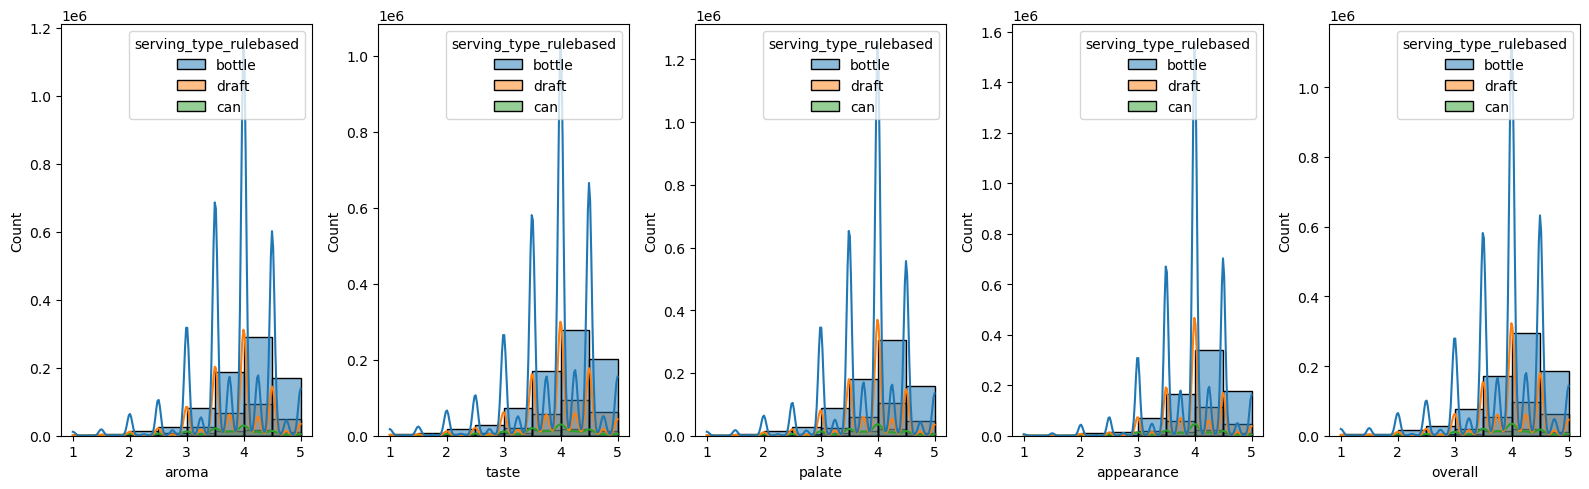

In [32]:
# Task 7.3 : analysis of the serving style on the ratings and tasting palette
# Histogram of the ratings for each serving type
plt.subplots(figsize=(16, 5))
plt.subplot(151)
sns.histplot(data=df, hue='serving_type_rulebased', x='aroma', kde=True, bins=8)
plt.subplot(152)
sns.histplot(data=df, hue='serving_type_rulebased', x='taste', kde=True, bins=8)
plt.subplot(153)
sns.histplot(data=df, hue='serving_type_rulebased', x='palate', kde=True, bins=8)
plt.subplot(154)
sns.histplot(data=df, hue='serving_type_rulebased', x='appearance', kde=True, bins=8)
plt.subplot(155)
sns.histplot(data=df, hue='serving_type_rulebased', x='overall', kde=True, bins=8)
plt.tight_layout()
plt.show()